# Business Problem
As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

# Research Question
#### Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

# Importing Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Description

The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. 
For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key features included in the dataset are as follows:
- Date: The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
- Ad Views: The number of times the ad was viewed.
- Ad Clicks: The number of clicks received on the ad.
- Ad Conversions: The number of conversions resulting from the ad.
- Cost per Ad: The cost associated with running the Facebook ad campaign.
- Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
- Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
- Cost per Click (CPC): The average cost incurred per click on the ad.

In [3]:
df=pd.read_csv('marketing_campaign.csv')
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

## Data Cleaning and EDA

In [6]:
#Changing into Date dtype
df['Date']= pd.to_datetime(df['Date'])

In [7]:
#Renaming columns

df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_').str.replace('facebook','fb')
df=df.rename(columns={'fb_click-through_rate_(clicks_/_view)':'fb_clicks_per_view',
                      'fb_conversion_rate_(conversions_/_clicks)':'fb_conversions_per_click',
                      'fb_cost_per_click_(ad_cost_/_clicks)':'fb_cost_per_click',
                  'adwords_click-through_rate_(clicks_/_view)':'adwords_clicks_per_view',
                      'adwords_conversion_rate_(conversions_/_click)':'adwords_conversions_per_click',
                      'adwords_cost_per_click_(ad_cost_/_clicks)':'adwords_cost_per_click',
                     'cost_per_fb_ad':'fb_cost_per_ad',
                      'cost_per_adwords_ad':'adwords_cost_per_ad'})

In [8]:
df.columns

Index(['date', 'fb_ad_campaign', 'fb_ad_views', 'fb_ad_clicks',
       'fb_ad_conversions', 'fb_cost_per_ad', 'fb_clicks_per_view',
       'fb_conversions_per_click', 'fb_cost_per_click', 'adwords_ad_campaign',
       'adwords_ad_views', 'adwords_ad_clicks', 'adwords_ad_conversions',
       'adwords_cost_per_ad', 'adwords_clicks_per_view',
       'adwords_conversions_per_click', 'adwords_cost_per_click'],
      dtype='object')

In [9]:
#Replacing signs and changing datatype

df['fb_cost_per_ad']=df['fb_cost_per_ad'].str.replace('$','').astype('float')
df['fb_clicks_per_view']=df['fb_clicks_per_view'].str.replace('%','').astype('float')
df['fb_conversions_per_click']=df['fb_conversions_per_click'].str.replace('%','').astype('float')
df['fb_cost_per_click']=df['fb_cost_per_click'].str.replace('$','').astype('float')

df['adwords_cost_per_ad']=df['adwords_cost_per_ad'].str.replace('$','').astype('float')
df['adwords_clicks_per_view']=df['adwords_clicks_per_view'].str.replace('%','').astype('float')
df['adwords_conversions_per_click']=df['adwords_conversions_per_click'].str.replace('%','').astype('float')
df['adwords_cost_per_click']=df['adwords_cost_per_click'].str.replace('$','').astype('float')


In [10]:
df.describe()

,date,fb_ad_views,fb_ad_clicks,fb_ad_conversions,fb_cost_per_ad,fb_clicks_per_view,fb_conversions_per_click,fb_cost_per_click,adwords_ad_views,adwords_ad_clicks,adwords_ad_conversions,adwords_cost_per_ad,adwords_clicks_per_view,adwords_conversions_per_click,adwords_cost_per_click
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,87.780822,2.201288,27.153288,2.187808,4717.19726,60.383562,5.980822,134.975342,1.295781,10.184356,2.377863
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,34.000000,0.830000,21.480000,0.610000,3714.00000,31.000000,3.000000,73.000000,0.570000,6.130000,0.850000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,63.000000,1.490000,23.800000,1.410000,4247.00000,49.000000,5.000000,110.000000,1.030000,7.700000,1.760000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,88.000000,2.000000,26.770000,2.020000,4711.00000,60.000000,6.000000,135.000000,1.290000,9.930000,2.290000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,111.000000,2.670000,28.970000,2.760000,5190.00000,73.000000,7.000000,162.000000,1.520000,12.030000,2.810000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,144.000000,5.370000,47.590000,7.140000,5760.00000,89.000000,9.000000,197.000000,2.250000,20.060000,5.650000
std,NaN,618.074639,12.140559,2.924786,28.263014,0.933193,4.165921,1.040820,561.11406,14.368225,1.628106,32.338304,0.338782,2.887445,0.856929


In [11]:
df.columns

Index(['date', 'fb_ad_campaign', 'fb_ad_views', 'fb_ad_clicks',
       'fb_ad_conversions', 'fb_cost_per_ad', 'fb_clicks_per_view',
       'fb_conversions_per_click', 'fb_cost_per_click', 'adwords_ad_campaign',
       'adwords_ad_views', 'adwords_ad_clicks', 'adwords_ad_conversions',
       'adwords_cost_per_ad', 'adwords_clicks_per_view',
       'adwords_conversions_per_click', 'adwords_cost_per_click'],
      dtype='object')

In [21]:
#num_columns=list(df.select_dtypes(exclude=['O','datetime']).columns)
num_columns=['fb_ad_views','adwords_ad_views','fb_ad_clicks','adwords_ad_clicks','fb_ad_conversions','adwords_ad_conversions','fb_cost_per_ad',
            'adwords_cost_per_ad','fb_clicks_per_view','adwords_clicks_per_view','fb_conversions_per_click','adwords_conversions_per_click',
            'fb_cost_per_click','adwords_cost_per_click']

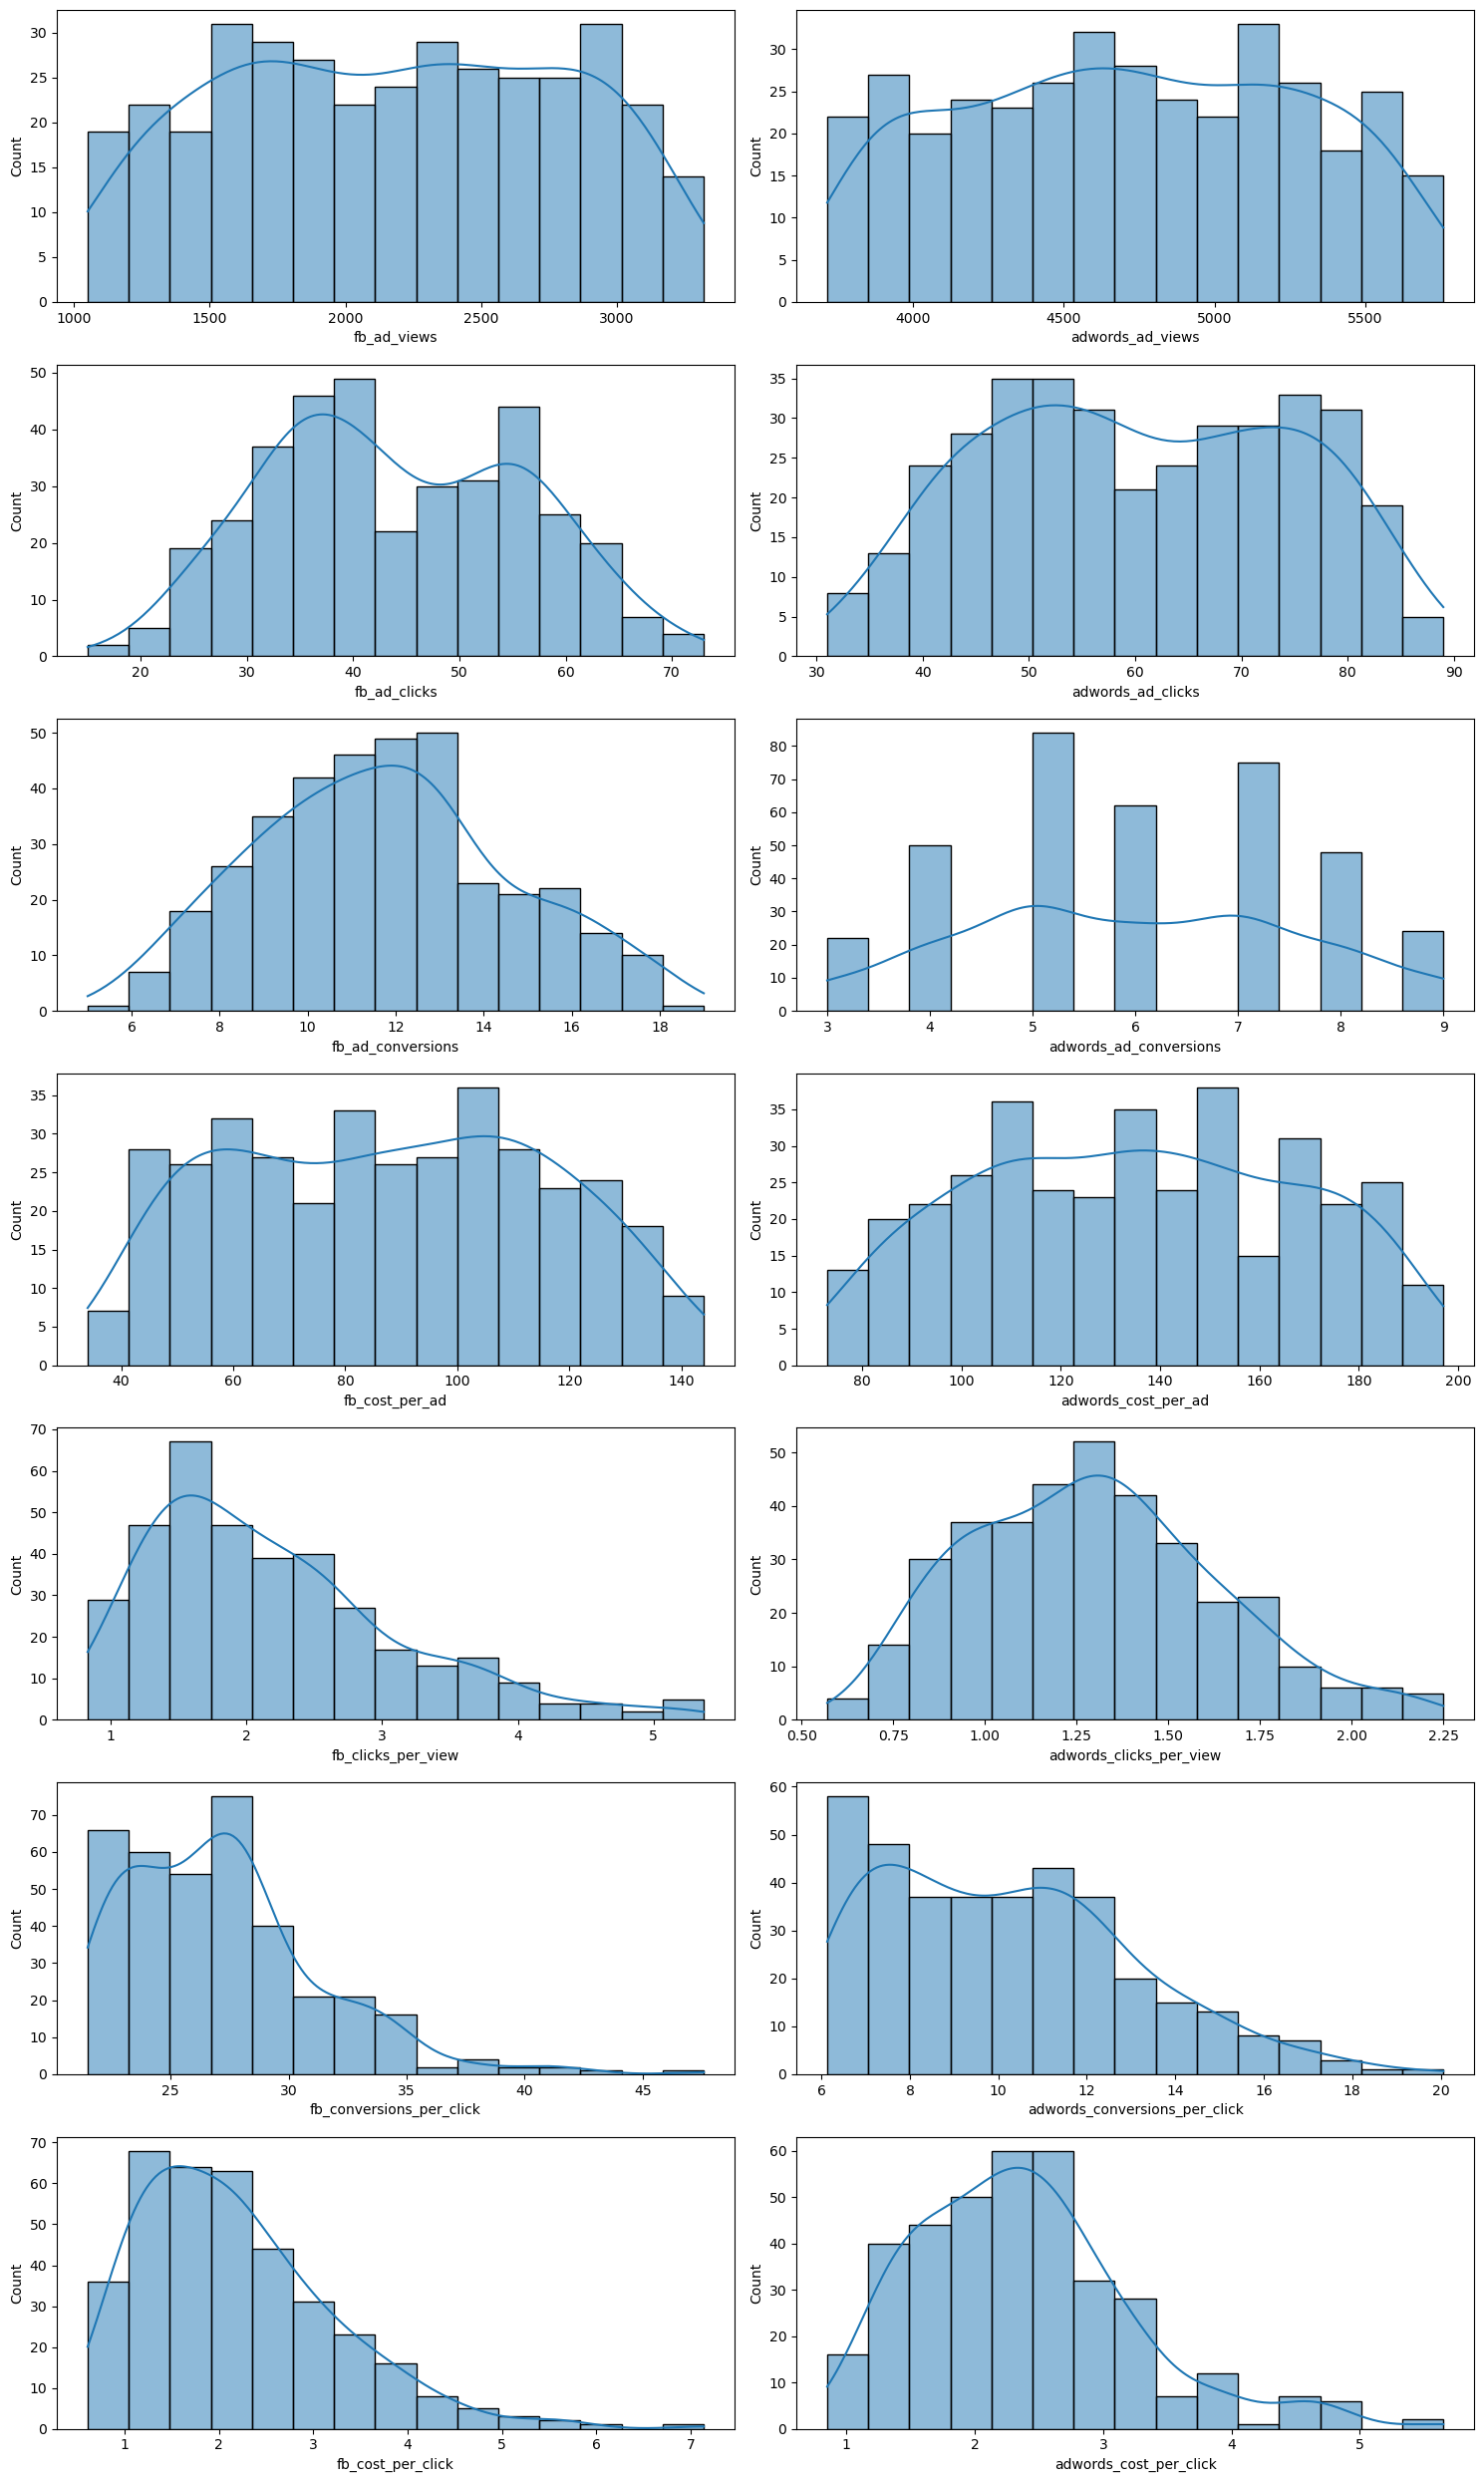

In [23]:
#Distribution of FB and Adwords data

fig,ax=plt.subplots(7,2,figsize=(15,25))
ax=ax.flatten()
for i,col in enumerate(num_columns):
    sns.histplot(df[col],kde=True,ax=ax[i],bins=15)

# Turn off unused axes
for j in range(len(num_columns), len(ax)):
    ax[j].axis('off')

plt.tight_layout()
plt.show()

### Based on above plots, we interpret following things:

-No visible outlier/extreme values present in any feature.

-Adwords does more **ad views** per day than Facebook.

-Adwords has got more **ad clicks** per day than Facebook.

-Facebook has got more **ad conversions** per day than Adwords.

-**Cost per ad** per day on Facebook is less, than on Adwords.

-**Click Through Rate (CTR)** on Facebook is higher than Adwords (Facebook does more clicks per view per day than adwords, contrary to having lesser total clicks than adwords).

-**Conversion Rate** on Facebook is higher than Adwords (Facebook does more conversions per click per day than Adwords).

-**Cost per click** per day on Facebook is lesser than Adwords.

### Between Facebook and Adwords, We'll now look at number of days with highest and lowest conversions by conversion category:

In [27]:
# Function to create conversion category

def create_conversion_category(conversion_col):
    conversion_category = []
    for col in conversion_col:  
        if col < 6:  
            conversion_category.append('Less than 6')
        elif 6 <= col <= 10:
            conversion_category.append('6-10')
        elif 10 < col <= 15:
            conversion_category.append('11-15')
        else:
            conversion_category.append('Greater than 15')
    return conversion_category

In [28]:
df['fb_conversion_category']= create_conversion_category(df['fb_ad_conversions'])
df['adwords_conversion_category']= create_conversion_category(df['adwords_ad_conversions'])

In [29]:
df[['fb_ad_conversions','fb_conversion_category','adwords_ad_conversions','adwords_conversion_category']].head()

,fb_ad_conversions,fb_conversion_category,adwords_ad_conversions,adwords_conversion_category
0,8,6-10,5,Less than 6
1,12,11-15,6,6-10
2,8,6-10,4,Less than 6
3,9,6-10,5,Less than 6
4,7,6-10,7,6-10


In [30]:
fb_ad_conversions_category_df=pd.DataFrame(df['fb_conversion_category'].value_counts().reset_index().rename(columns={'fb_conversion_category':'conversion_category'}))
adwords_ad_conversions_category_df=pd.DataFrame(df['adwords_conversion_category'].value_counts().reset_index().rename(columns={'adwords_conversion_category':'conversion_category'}))


In [31]:
conversion_categories= pd.merge(fb_ad_conversions_category_df,adwords_ad_conversions_category_df,on='conversion_category',how='outer').rename(columns={'count_x':'facebook','count_y':'adwords'}).fillna(0).iloc[[3,1,0,2]].reset_index(drop=True)
conversion_categories

,conversion_category,facebook,adwords
0,Less than 6,1,156.0
1,6-10,128,209.0
2,11-15,189,0.0
3,Greater than 15,47,0.0


In [32]:
X_axis=np.arange(len(conversion_categories))
X_axis

array([0, 1, 2, 3])

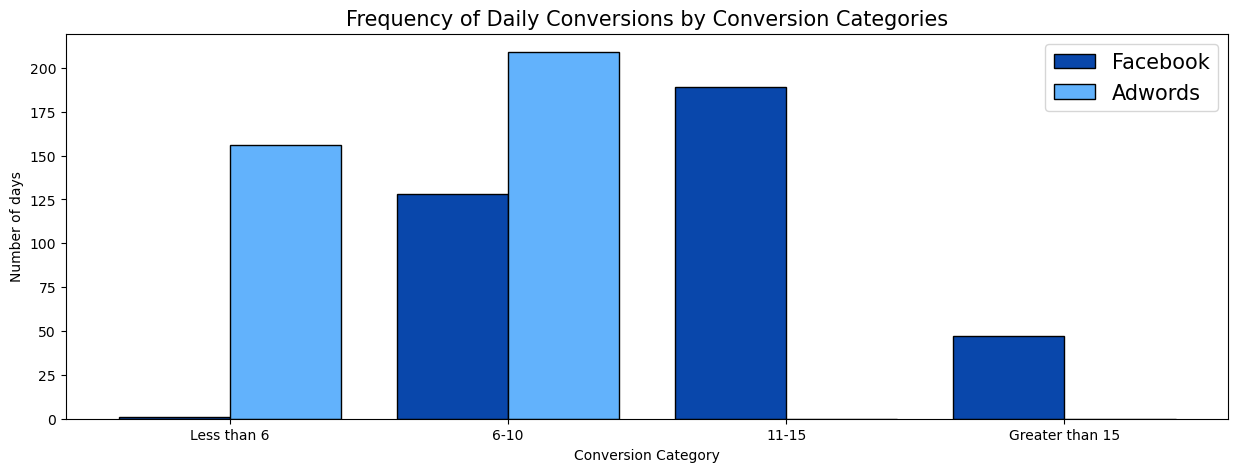

In [33]:
plt.figure(figsize = (15,5))
plt.bar(X_axis - 0.2, conversion_categories['facebook'], 0.4, label = 'Facebook', color = '#0947ab', linewidth = 1, edgecolor = 'k') 
plt.bar(X_axis + 0.2, conversion_categories['adwords'], 0.4, label = 'Adwords', color = '#62b2fc', linewidth = 1, edgecolor = 'k') 
  
plt.xticks(X_axis, conversion_categories['conversion_category']) 
plt.xlabel("Conversion Category") 
plt.ylabel("Number of days") 
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15) 
plt.legend(fontsize = 15) 
plt.show() 

### From above plot, we can infer that:
- The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversions (less than 6) or moderate ones (6 - 10).
- There is a significant variance in the number of high-conversion days between two different campaigns.
- The absence of any days with conversions between 10 - 15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

## Between Facebook and Adwords, Which campaign has higher corelation between Clicks and Conversions?

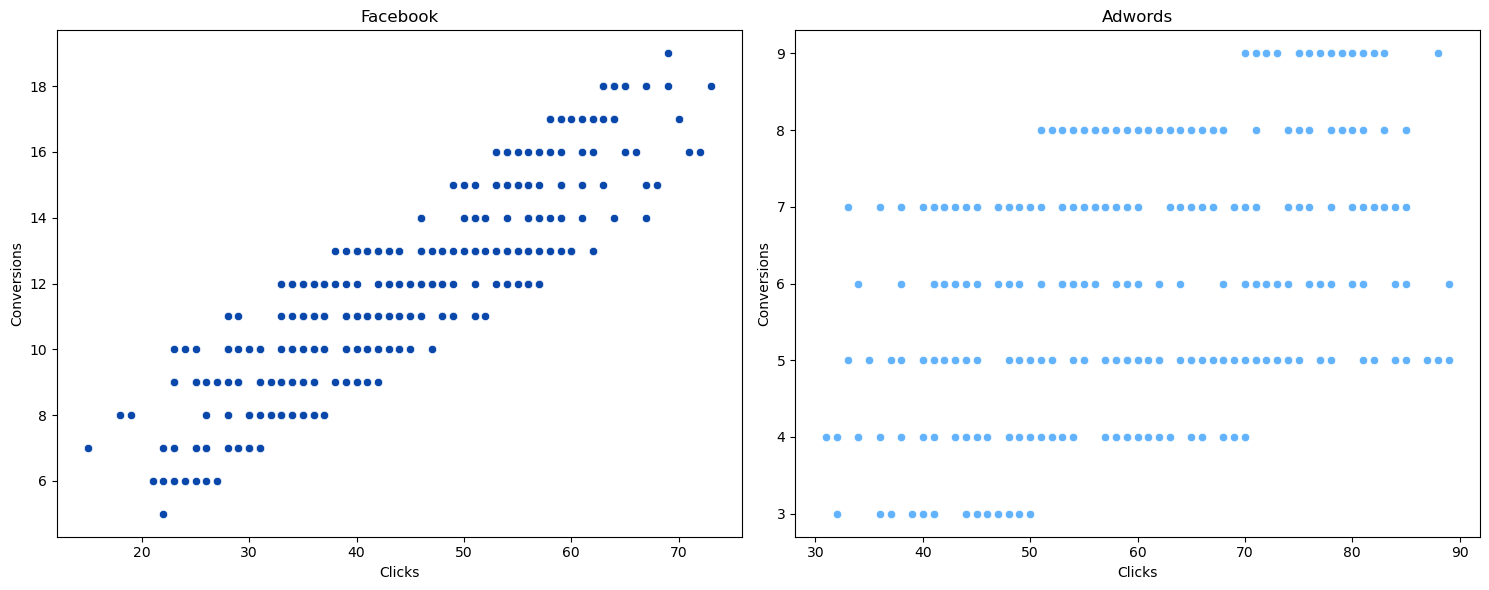

In [45]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x='fb_ad_clicks',y='fb_ad_conversions',data=df,color = '#0947ab')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.title('Facebook')
plt.subplot(1,2,2)
sns.scatterplot(x='adwords_ad_clicks',y='adwords_ad_conversions',data=df,color = '#62b2fc')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.title('Adwords')
plt.tight_layout()
plt.show()

#### We can see Positive corelation on both, but Facebook shows more Stronger linear relationship between clicks and conversions than Adwords.

#### Let's quantify this relation below:

In [47]:
df[['fb_ad_clicks','fb_ad_conversions']].corr().values[0][1]

0.8737750148613915

In [48]:
df[['adwords_ad_clicks','adwords_ad_conversions']].corr().values[0][1]

0.44799320094697664

In [52]:
print('Corelation coefficienct between clicks and conversion:\n------------------------------------------------------')
print('Facebook: '+str(round(df[['fb_ad_clicks','fb_ad_conversions']].corr().values[0][1],3)))
print('Adwords: '+str(round(df[['adwords_ad_clicks','adwords_ad_conversions']].corr().values[0][1],3)))

Corelation coefficienct between clicks and conversion:
------------------------------------------------------
Facebook: 0.874
Adwords: 0.448


- A correlation coefficient of 0.874 indicates a strong positive linear relationship between clicks on Facebook ads and conversion. This clearly suggests that Most of the Clicks on Facebook ads is very likely to result into conversions.
- This strong correlation suggests that Facebook ads are highly effective.
- The strong correlation between clicks and conversion on Facebook ads suggests that Increasing investment in Facebook ads or optimizing their performance could potentially yield more profitable results for the client.
- A correlation coefficient of 0.45 on Adwords ads indicates a moderate positive linear relationship between clicks on ads and conversion. While there is still a positive relationship, it is not as strong as with Facebook ads.
- This indicates that while AdWords advertising does contribute, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns if needed accordingly.

## To statistically prove above, Let's conduct a **Hypothesis testing** on conversion:


**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis (H0):** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

H0: µ_Facebook ≤ µ_AdWords

**Alternate Hypothesis (H1):** The number of conversions from Facebook is greater than the number of conversions from AdWords.

H1: µ_Facebook > µ_AdWords

In [58]:
import scipy.stats as st

In [60]:
t_stats,p_value= st.ttest_ind(df['fb_ad_conversions'],df['adwords_ad_conversions'],equal_var=False,alternative='greater')
print('\nT statistic: ', t_stats, '\np-value: ',p_value)

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")


T statistic:  32.88402060758184 
p-value:  4.674459082265232e-134

p-value is less than significance value, Reject the null hypothesis


- The mean number of conversions from Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compared to AdWords advertising.
- The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.
- The p-value (9.35e-134) is extremely small, indicating strong evidence against the null hypothesis.
- The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.
- Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.
- Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

## Let's check the Cost-Effectiveness of both campaigns:

### We'll be using following metrics to analyze cost-effectiveness:

- **CPC (Cost Per Click):**  
  The amount spent for each click on an ad.  
  Formula:  
  $$ \text{CPC} = \frac{\text{Cost}}{\text{Clicks}} $$

- **CTR (Click-Through Rate):**  
  The ratio of users who click on an ad to the number of total users who view the ad.  
  Formula:  
  $$ \text{CTR} = \frac{\text{Clicks}}{\text{Impressions}} \times 100 $$

- **CPM (Cost Per Mille):**  
  The cost for 1,000 impressions or views of an ad.  
  Formula:  
  $$ \text{CPM} = \frac{\text{Cost}}{\text{Impressions}} \times 1000 $$

- **CPCV (Cost Per Completed View):**  
  The amount spent for each completed view of the ad.  
  Formula:  
  $$ \text{CPCV} = \frac{\text{Cost}}{\text{Completed Views}} $$  


In [66]:
#Adding Additional columns for analyzing cost-effectiveness

df['month'] =df['date'].dt.month
df['fb_cost_per_conversion']=df['fb_cost_per_ad']/df['fb_ad_conversions']
df['adwords_cost_per_conversion']=df['adwords_cost_per_ad']/df['adwords_ad_conversions']
df['fb_cost_per_1000_views'] =df['fb_cost_per_ad']*1000/df['fb_ad_views']
df['adwords_cost_per_1000_views'] =df['adwords_cost_per_ad']*1000/df['adwords_ad_views']

In [68]:
cost_vars=['fb_cost_per_ad','adwords_cost_per_ad','fb_cost_per_1000_views','adwords_cost_per_1000_views',
           'fb_cost_per_click','adwords_cost_per_click','fb_cost_per_conversion','adwords_cost_per_conversion',
          'fb_clicks_per_view','adwords_clicks_per_view']

cost_vars_df=df.groupby(['month'])[cost_vars].sum()
cost_vars_df.head()

,fb_cost_per_ad,adwords_cost_per_ad,fb_cost_per_1000_views,adwords_cost_per_1000_views,fb_cost_per_click,adwords_cost_per_click,fb_cost_per_conversion,adwords_cost_per_conversion,fb_clicks_per_view,adwords_clicks_per_view
month,,,,,,,,,,
1,2594.0,4284.0,1256.379785,949.048593,77.52,77.04,259.553524,841.358333,59.05,41.20
2,2497.0,3667.0,1240.761758,793.516510,71.05,65.53,246.515167,658.948413,53.02,35.98
3,2903.0,4063.0,1627.849562,885.077353,78.25,76.54,284.177735,783.734921,68.76,38.80
4,2614.0,4354.0,1355.526740,945.980013,69.30,75.34,255.550816,757.181746,64.72,39.74
5,2435.0,4018.0,1196.570715,853.538423,66.88,72.23,242.958713,736.365476,60.74,38.87


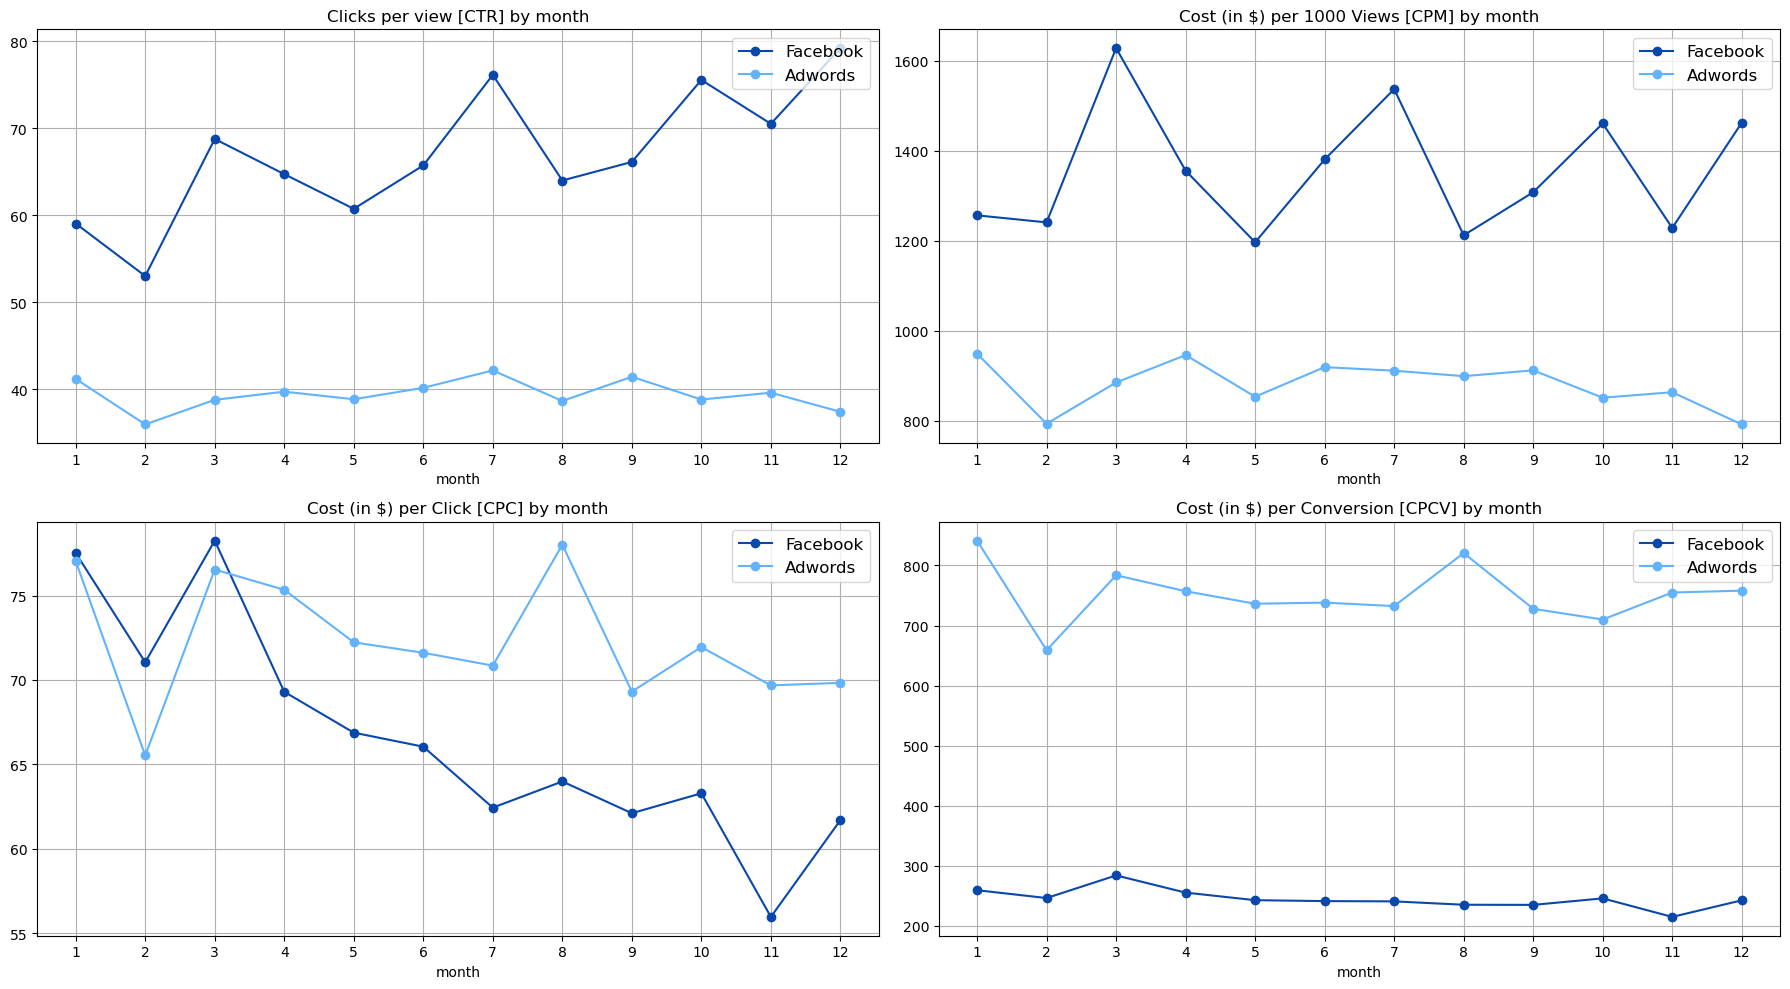

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10))
ax = ax.flatten()

cost_vars_df[['fb_clicks_per_view', 'adwords_clicks_per_view']].plot(
    marker='o', ax=ax[0], color=['#0947ab', '#62b2fc'],label=['Facebook','Adwords'])
ax[0].set_xticks(cost_vars_df.index)
ax[0].set_title("Clicks per view [CTR] by month")
ax[0].grid(True)
ax[0].legend(['Facebook', 'Adwords'], loc='upper right', fontsize=12)

cost_vars_df[['fb_cost_per_1000_views', 'adwords_cost_per_1000_views']].plot(
    marker='o', ax=ax[1], color=['#0947ab', '#62b2fc'])
ax[1].set_xticks(cost_vars_df.index)
ax[1].set_title("Cost (in $) per 1000 Views [CPM] by month")
ax[1].grid(True)
ax[1].legend(['Facebook', 'Adwords'], loc='upper right', fontsize=12)

cost_vars_df[['fb_cost_per_click', 'adwords_cost_per_click']].plot(
    marker='o', ax=ax[2], color=['#0947ab', '#62b2fc'])
ax[2].set_xticks(cost_vars_df.index)
ax[2].set_title("Cost (in $) per Click [CPC] by month")
ax[2].grid(True)
ax[2].legend(['Facebook', 'Adwords'], loc='upper right', fontsize=12)

cost_vars_df[['fb_cost_per_conversion', 'adwords_cost_per_conversion']].plot(
    marker='o', ax=ax[3], color=['#0947ab', '#62b2fc'])
ax[3].set_xticks(cost_vars_df.index)
ax[3].set_title("Cost (in $) per Conversion [CPCV] by month")
ax[3].grid(True)
ax[3].legend(['Facebook', 'Adwords'], loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()
	

### From above plot, Below is our Interpretation of Metrics:

#### CPC vs CTR:
- **Facebook:** Low CPC + High CTR → Facebook is cost-efficient and engages users well, generating more clicks for a lower cost.
- **Adwords:** High CPC + Low CTR → Adwords has higher costs per click and lower engagement, which might not be as cost-efficient.

#### CPM vs CTR:
- **Facebook:** High CPM + High CTR → Facebook’s campaigns are premium but effective, offering valuable reach with high engagement.
- **Adwords:** Low CPM + Low CTR → Adwords offers a more cost-effective reach, but the engagement is comparatively low.

#### CPCV:
- **Facebook:** Low CPCV → Facebook’s cost per completed view is low, indicating that it is more cost-efficient in driving views that are fully completed.
- **Adwords:** High CPCV → Adwords has a higher cost per completed view, which means it is spending more to achieve a completed view, suggesting that it is less efficient in this aspect compared to Facebook.


# Regression Analysis

## Now that we know, Facebook gives more conversions per clicks, Let's build a Linear regression model to predict No. of conversion given 'x' number of clicks on facebook.

In [77]:
#import libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [79]:
#Independent and dependent feature

X=df[['fb_ad_clicks']]
y=df['fb_ad_conversions']

In [81]:
#Split the data into training and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
#Creating instance for Linear regression and training the model

lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [85]:
#Predicting on training and testing data

train_prediction=lm.predict(X_train)
test_prediction=lm.predict(X_test)

In [87]:
#Evaluation of prediction on training and testing

print('Training data prediction score:\n--------------------')
print('R2 score: '+str(round( r2_score(y_train,train_prediction)*100,2))+' %')
print('Mean Abosulte Error (MAE): '+str(round( mean_absolute_error(y_train,train_prediction),2)))
print('Mean Squared Error (MSE): '+str(round( mean_squared_error(y_train,train_prediction),2)))
print('\nTest data prediction score:\n--------------------')
print('R2 score: '+str(round( r2_score(y_test,test_prediction)*100,2))+' %')
print('Mean Abosulte Error (MAE): '+str(round( mean_absolute_error(y_test,test_prediction),2)))
print('Mean Squared Error (MSE): '+str(round( mean_squared_error(y_test,test_prediction),2)))

Training data prediction score:
--------------------
R2 score: 75.96 %
Mean Abosulte Error (MAE): 1.19
Mean Squared Error (MSE): 1.98

Test data prediction score:
--------------------
R2 score: 77.52 %
Mean Abosulte Error (MAE): 1.32
Mean Squared Error (MSE): 2.19


#### R2 score of prediction on Test data is higher than on the training data, indicating that Our model has not overfitted and performing well.
#### R2 score of 77.52% indicates our model is performing well in predicting new unseen conversions based on click.
#### MAE value of 1.32 is minimal indicating our model prediction is quite accurate.

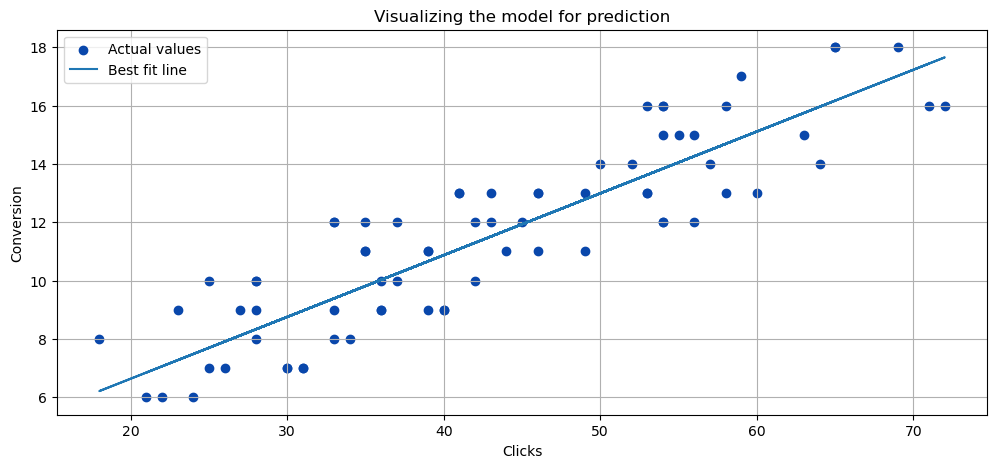

In [158]:
plt.figure(figsize=(12,5))
plt.scatter(x=X_test,y=y_test,label='Actual values',color='#0947ab')
plt.plot(X_test,test_prediction,label='Best fit line')
plt.xlabel('Clicks')
plt.ylabel('Conversion')
plt.title('Visualizing the model for prediction')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
print('For 50 clicks, Expected conversions: ' + str(round(lm.predict([[50]])[0],2)))
print('For 100 clicks, Expected conversions: ' + str(round(lm.predict([[80]])[0],2)))


For 50 clicks, Expected conversions: 12.99
For 100 clicks, Expected conversions: 19.35


- With the insights provided by the above Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.
- For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising efforts.

## With Facebook campaign, Let's look at the Trend of Ad conversions by weekdays and by month:

In [122]:
df['weekday']= df['date'].dt.weekday

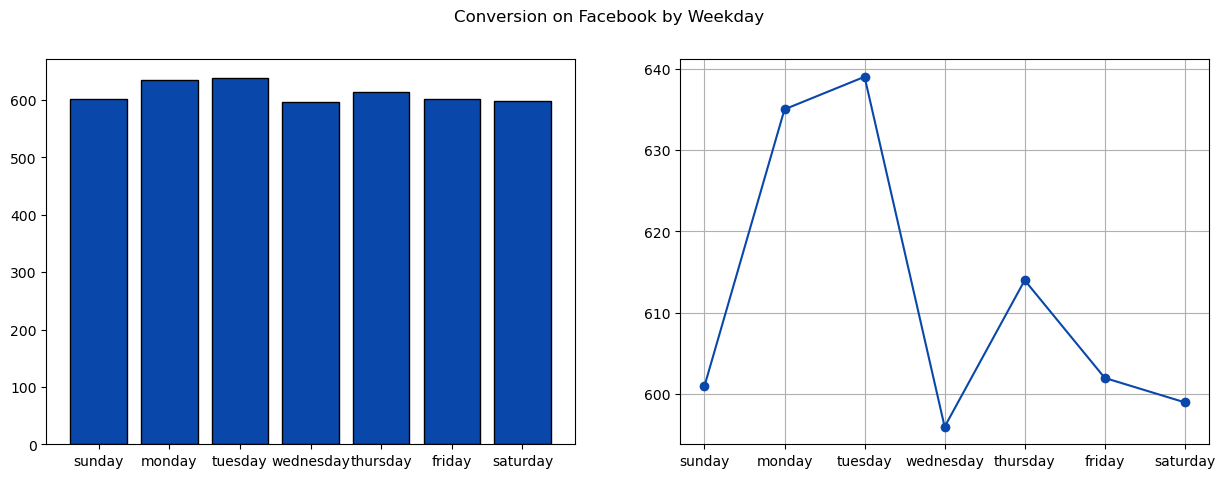

In [208]:
conversion_by_weekday_df=df.groupby(['weekday'])[['fb_ad_conversions']].sum()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.bar(conversion_by_weekday_df.index,conversion_by_weekday_df['fb_ad_conversions'],color='#0947ab',edgecolor='k')
plt.xticks(conversion_by_weekday_df.index,['sunday','monday','tuesday','wednesday','thursday','friday','saturday'])

plt.subplot(1,2,2)
plt.plot(conversion_by_weekday_df.index,conversion_by_weekday_df['fb_ad_conversions'],color='#0947ab',marker='o')
plt.xticks(conversion_by_weekday_df.index,['sunday','monday','tuesday','wednesday','thursday','friday','saturday'])
plt.grid(True)

plt.suptitle('Conversion on Facebook by Weekday')
plt.show()

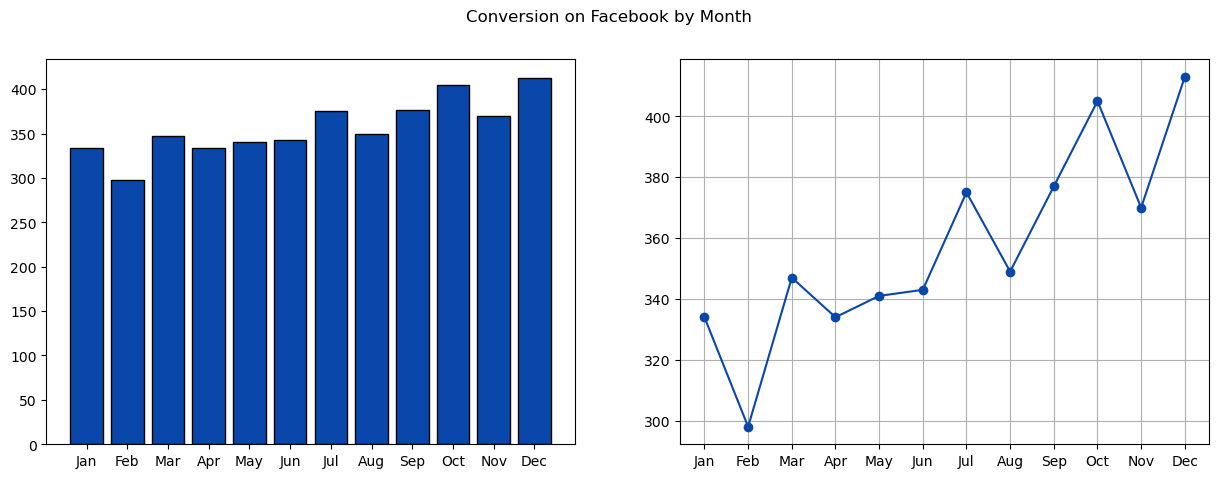

In [210]:
conversion_by_month_df=df.groupby(['month'])[['fb_ad_conversions']].sum()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.bar(conversion_by_month_df.index,conversion_by_month_df['fb_ad_conversions'],color='#0947ab',edgecolor='k')
plt.xticks(conversion_by_month_df.index,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.subplot(1,2,2)
plt.plot(conversion_by_month_df.index,conversion_by_month_df['fb_ad_conversions'],color='#0947ab',marker='o')
plt.xticks(conversion_by_month_df.index,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)

plt.suptitle('Conversion on Facebook by Month')
plt.show()

Looking at the plots above:
- Across the weekdays over a year, the total number of conversions remains consistent throughout the week. However, **Mondays and Tuesdays particularly exhibit the highest conversion rates compared to other days**, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.
- Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. **February, April, June, August, and November experience a decline in conversions compared to neighboring months.** These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies.

## During which month do we see Highest and Lowest Cost per conversion:

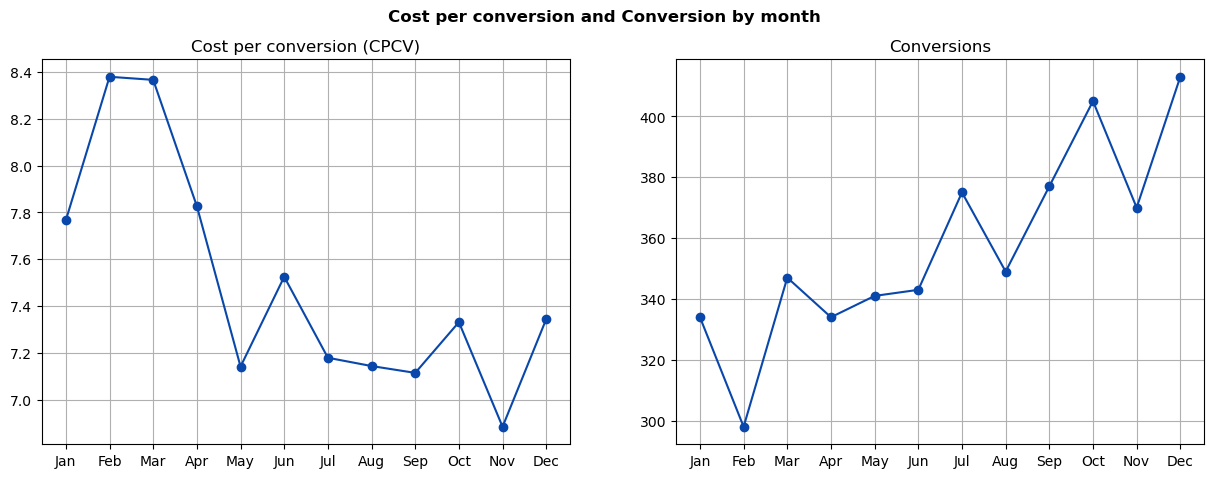

In [274]:
cost_per_conversion_by_month_df=df.groupby(['month'])[['fb_cost_per_ad', 'fb_ad_conversions']].sum()
cost_per_conversion_by_month_df['monthly_cost_per_conversion']=cost_per_conversion_by_month_df['fb_cost_per_ad']/cost_per_conversion_by_month_df['fb_ad_conversions']
cost_per_conversion_by_month_df
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(cost_per_conversion_by_month_df.index,cost_per_conversion_by_month_df['monthly_cost_per_conversion'], marker='o',color='#0947ab')
plt.xticks(cost_per_conversion_by_month_df.index,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('\nCost per conversion (CPCV)')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(conversion_by_month_df.index,conversion_by_month_df['fb_ad_conversions'],color='#0947ab',marker='o')
plt.xticks(conversion_by_month_df.index,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('\nConversions')
plt.grid(True)

plt.suptitle('Cost per conversion and Conversion by month',fontweight='bold')
plt.show()

-From above comparison plot between CPCV and Conversion, we can note that Both are inversely proportional.

-meaning, Months with Higher cost per conversion (Jan-Feb-Mar-Apr) has lower total conversions & Months with Lower cost per conversion (Jul to Dec) has Higher total conversions.

-Cost per conversion increases when there is low conversion.

-Consider allocating more advertising budget to months with historically lower CPCV values (e.g., May and November) to maximize ROI.